# Exective summary of Work Package 2

## Objectives

This work package aims at developing a data-driven fault detection algorithm for the motors in the robot. The algorithm should be able to accurately detect faults under different working conditions of the robot, and to display the results in the GUI developed in WP1.

## Tasks

- Task 1: Training data generation: Generate training data for your model, considering different working conditions of the robot.
- Task 2: Model development.
  - Data cleaning, preprocessing
  - Investigate different possible model and train the final model
- Task 3: GUI design and implementation.
- Task 4: Data challenge: Each group will generate a separate dataset, which will be used to construct a final evaluation dataset for the other groups. The performance of your model will be evaluated through this testing dataset.

## Delierables

- A Jupyter notebook reporting the model development process, including but not limited to:
  - Data cleaning, preprocessing
  - The models you tried and their performance evaluation through cross validation
  - The final model with best performance
- A demo software for condition-monitoring and fault detection:
  - The software should be able to read the data from the robot and display the results in the GUI.
  - The software should be able to detect faults in the robot and display the results in the GUI.
  - Record a video with the robot to demonstrate the functionality of your software.


# Working plan for today's TD

Today, we mainly work on task 2. More specifically, we will work on the following:
1. Explore the data we collected last week, including:
    - Data visualization to explore the patterns of the data
    - Use Principle Component Analysis (PCA) or t-SNE to visualize the data, in order to have a first flavor about the difficulty of the problem 
    - Explore if we have a significant difference between different sequences through visualization and clustering
2. Data cleaning and preprocessing
    - Missing values and outlier handling
    - Feature engineering
3. Apply statistical testing approach.
4. Apply a simple logistic regression model as a benchmark model for the classification task.

Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch called "WP2_TD_Lect_6_YourName", based on the branch "zhiguo_dev_DARR" and switch to it.
- Copy the notebook WP2_DATA-DRIVEN FAULT DETECTION/support/WP2_TD_Lect_6 to WP2_DATA-DRIVEN FAULT DETECTION/TD_6/, and rename it to TD_Lect_6_YourName.ipynb
- After finishing this task, push your changes to your github repository.
- Submit a pull request to the "zhiguo_dev" branch.

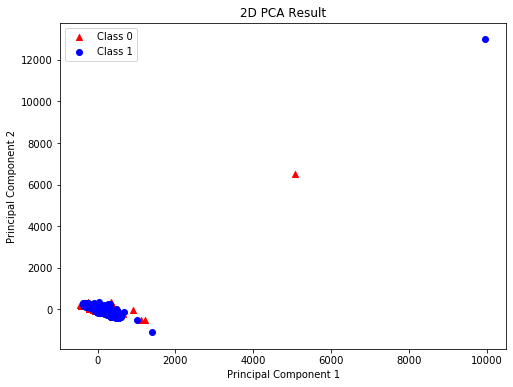

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def combine_csv(folder_path, seq_idx, label):
    """
    Combine all CSV files in a folder into a single DataFrame.
    :param folder_path: Path to the folder containing the CSV files
    :param seq_idx: Sequence index
    :param label: Label of the sequence (Normal - 0, Abnormal - 1)
    :return: A single DataFrame containing all the data from the CSV files
    """

    # Get a list of all CSV files in the folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Create an empty DataFrame to store the combined data
    combined_df = pd.DataFrame()

    # Iterate over the CSV files in the folder
    for file in csv_files:
        # Construct the full path to each CSV file
        file_path = os.path.join(folder_path, file)

        # Read each CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Drop the time. Will add later.
        df = df.drop(labels=df.columns[0], axis=1)

        # Extract the file name (excluding the extension) to use as a prefix
        file_name = os.path.splitext(file)[0]

        # Add a prefix to each column based on the file name
        df = df.add_prefix(f'{file_name}_')

        # Concatenate the current DataFrame with the combined DataFrame
        combined_df = pd.concat([combined_df, df], axis=1)

    df = pd.read_csv(file_path)
    combined_df = pd.concat([df['time'], combined_df], axis=1)
    combined_df.loc[:, 'sequence_idx'] = seq_idx
    combined_df.loc[:, 'label'] = label

    return combined_df


def combine_all_csv(path, label, seq_idx=0):
    """
    Combine all CSV files in a folder into a single DataFrame.
    :param path: Path to the folder containing the CSV files
    :param label: Label of the sequence (Normal - 0, Abnormal - 1)
    :return: A single DataFrame containing all the data from the CSV files
    """
    # Get all directories in the given path
    folders = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    df = pd.DataFrame()
    for folder in folders:
        folder_path = path+'\\'+folder
        tmp_df = combine_csv(folder_path, seq_idx, label)
        seq_idx += 1
        df = pd.concat([df, tmp_df])
        df = df.reset_index(drop=True)

    return  df


def read_data(path_normal, path_failure):
    df = pd.concat([combine_all_csv(path_normal, 0), combine_all_csv(path_failure, 1, seq_idx=4)]).reset_index(drop=True)

    return df


if __name__ == '__main__':
    # Root path to the folder containing the CSV files
    path_normal = r'C:\Users\User\Documents\GitHub\digital_twin_robot\course_project_DARR\WP2_Data-driven fault detection\Data collection_20231109\Normal sequence'
    path_failure = r'C:\Users\User\Documents\GitHub\digital_twin_robot\course_project_DARR\WP2_Data-driven fault detection\Data collection_20231109\Failure sequence'
    df = read_data(path_normal, path_failure)

    # Separate the features (X) and the target variable (y)
    X = df.drop(['label', 'sequence_idx', 'time'], axis=1)
    y = df['label']
    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform PCA to reduce the dimensionality to 2 dimensions
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', label='Class 0')
    plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', label='Class 1')
    plt.title('2D PCA Result')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

In [2]:
# Root path to the folder containing the CSV files
path_normal = r'C:\Users\User\Documents\GitHub\digital_twin_robot\course_project_DARR\WP2_Data-driven fault detection\Data collection_20231109\Normal sequence'
path_failure = r'C:\Users\User\Documents\GitHub\digital_twin_robot\course_project_DARR\WP2_Data-driven fault detection\Data collection_20231109\Failure sequence'
df = read_data(path_normal, path_failure)
print(df)

                      time  data_motor_1_position  data_motor_1_temperature  \
0     09-Nov-2023 16:06:12                    369                        31   
1     09-Nov-2023 16:06:12                    369                        31   
2     09-Nov-2023 16:06:12                    369                        31   
3     09-Nov-2023 16:06:13                    369                        31   
4     09-Nov-2023 16:06:13                    369                        31   
...                    ...                    ...                       ...   
3590  09-Nov-2023 16:24:45                    544                        52   
3591  09-Nov-2023 16:24:45                    544                        52   
3592  09-Nov-2023 16:24:46                    544                        52   
3593  09-Nov-2023 16:24:46                    544                        53   
3594  09-Nov-2023 16:24:46                    545                        52   

      data_motor_1_voltage  data_motor_2_position  

# Exercise 5 Implement logistic regression

Logistic regression is a simple and powerful machine learning algorithm. It is used for classification problems. It is a binary classifier, meaning that it can distinguish between only two classes. Often, it is used as a "quick and dirty" method to create benchmark for a classification problem.

In this exercise, we will implement logistic regression in our dataset. You will try:
- Use sklearn to implement logistic regression
- Hyper-parameter tuning in logistic regression
- Use cross-validation to evaluate the performance of your model



### Task 1: Effect of hyper-parameter and normalization

Below is a sample code for logistic regression.
- Try to change different values of hyper-parameter $C$, and see the impact on the results.
- In this code, we did not do any preprocessing on the data. You can try to implement your preprocessing and see the impacts on the results.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

[[360  41]
 [ 38 280]]
Accuracy: 0.8901251738525731
Precision: 0.8722741433021807
Recall: 0.8805031446540881


C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Apply normalization and standardization in the dataset

In [5]:
#Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_st = scaler.fit_transform(X)

#Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_st_norm = scaler.fit_transform(X_st)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Train test split on the dataset
X_train, X_test, y_train, y_test = train_test_split(X_st_norm, y, test_size=0.2, random_state=42)

# logistic regression model
logreg = LogisticRegression(C=.1)
logreg.fit(X_train, y_train)

# Preditions on testing set
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


[[353  48]
 [105 213]]
Accuracy: 0.7872044506258693
Precision: 0.8160919540229885
Recall: 0.6698113207547169


## Task 2: Use $k$-fold cross validation to evaulate the performance

In the previous sample code, we used a single train-test split to evaluate the performance of our model. However, in practice, we want to use a more robust method to evaluate the performance of our model. One common method is to use $k$-fold cross validation. In this task, we will use $k$-fold cross validation to evaluate the performance of our model. Please implement a cross-validation with $k=5$, and calculate the average accuracy, precision, recall and F1 score of the tests.

This is a routine task which can be easily sovled by current LLM like chatgpt or Tongyi Lingma. I let you try to generate your code by yourself.



# Answer with normalized and standardized data (penalty = l2, C=0.1)

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Logistic regression model
logreg = LogisticRegression(penalty = 'l2', C=0.1)

# 5-fold Cross-Validation
cv_accuracy = cross_val_score(logreg, X_st_norm, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(logreg, X_st_norm, y, cv=5, scoring='precision')
cv_recall = cross_val_score(logreg, X_st_norm, y, cv=5, scoring='recall')
cv_f1 = cross_val_score(logreg, X_st_norm, y, cv=5, scoring=make_scorer(f1_score))

avg_accuracy = cv_accuracy.mean()
avg_precision = cv_precision.mean()
avg_recall = cv_recall.mean()
avg_f1 = cv_f1.mean()

# Print results
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Average Accuracy: 0.7187760778859528
Average Precision: 0.7644619531411985
Average Recall: 0.6255491931285789
Average F1 Score: 0.6740695804230945


## Task 3: Tuning the hyper-parameter of the model

We can tune the hyper-parameters of our model by using the GridSearchCV function. A more efficient way is to create a pipeline that includes the hyper-parameter tuning, and prediction. You can try to generate the code using the following prompt:

```Prompt
Create a pipeline, where the first step is to use GridSearchcv to tune the hyper-parameter C of a logistic regression, and the second step is to use the best parameters to make predictions. 

Try to implement the generated code on our dataset here:

# Pipeline with GridSearch CV - Logistic Regression (Scoring metric: Accuracy)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.compose import TransformedTargetRegressor


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_st_norm, y, test_size=0.2, random_state=42)


# Define the pipeline
pipeline = TransformedTargetRegressor(
    regressor=GridSearchCV(
        LogisticRegression(),
        param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
        cv=5,  # 5-fold cross-validation
        scoring='accuracy'
    ),
    transformer=None
)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", pipeline.regressor_.best_params_)

# Make predictions
y_pred_tuned = pipeline.predict(X_test)

# Calculate metrics
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)

# Print results
print("Confusion Matrix with Tuned Model:")
print(conf_matrix_tuned)
print("Accuracy with Tuned Model:", accuracy_tuned)
print("Precision with Tuned Model:", precision_tuned)
print("Recall with Tuned Model:", recall_tuned)


C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaco

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Confusion Matrix with Tuned Model:
[[365  36]
 [ 18 300]]
Accuracy with Tuned Model: 0.9248956884561892
Precision with Tuned Model: 0.8928571428571429
Recall with Tuned Model: 0.9433962264150944


## Task 4: Use the pipeline in cross validation

Then, you can use your defined pipeline to automatically tune the hyper-parameter and use the best model for classification. Please try this on the code of Task 2, i.e., use the pipeline in the cross validation. You just need to replace the logistic classifier with the pipeline.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Train test split on the dataset
X_train, X_test, y_train, y_test = train_test_split(X_st_norm, y, test_size=0.2, random_state=42)

pipeline = TransformedTargetRegressor(
    regressor=GridSearchCV(
        LogisticRegression(),
        param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
        cv=5,  # 5-fold cross-validation
        scoring='accuracy'
    ),
    transformer=None
)

# Cross-validation using the pipeline
cv_accuracy = cross_val_score(pipeline, X_st_norm, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(pipeline, X_st_norm, y, cv=5, scoring='precision')
cv_recall = cross_val_score(pipeline, X_st_norm, y, cv=5, scoring='recall')
cv_f1 = cross_val_score(pipeline, X_st_norm, y, cv=5, scoring=make_scorer(f1_score))

avg_accuracy = cv_accuracy.mean()
avg_precision = cv_precision.mean()
avg_recall = cv_recall.mean()
avg_f1 = cv_f1.mean()

# Print results
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaco

C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaco

C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaco

C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\s

C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed.

C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed.

Average Accuracy: 0.6561891515994436
Average Precision: 0.547906976744186
Average Recall: 0.39963731678613457
Average F1 Score: 0.45233654533445533


### Lbfgs Solver Warning
According to the warning lbfgs solver cannot be used with a "l1" penalty, therefore a new hyperparameter tuning should take place, that includes only valid combinations. lbfgs solver can be combined only with "l2" penalty or "none". 

After extensive research on the parameters of Logistic Regression and in order for normal results to occur in terms of iterations, penalties and C accountability, they have been adjusted as below.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_st_norm, y, test_size=0.2, random_state=42)

#Pipeline
pipeline = TransformedTargetRegressor(
    regressor=GridSearchCV(
        LogisticRegression(max_iter=1000, solver='liblinear'),
        param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']},
        cv=5,  # 5-fold cross-validation
        scoring='accuracy'
    ),
    transformer=None
)

# Task 2: Cross-validation using the pipeline
cv_accuracy = cross_val_score(pipeline, X_st_norm, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(pipeline, X_st_norm, y, cv=5, scoring='precision')
cv_recall = cross_val_score(pipeline, X_st_norm, y, cv=5, scoring='recall')
cv_f1 = cross_val_score(pipeline, X_st_norm, y, cv=5, scoring=make_scorer(f1_score))

avg_accuracy = cv_accuracy.mean()
avg_precision = cv_precision.mean()
avg_recall = cv_recall.mean()
avg_f1 = cv_f1.mean()

# Print results
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\envs\MDM\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average Accuracy: 0.674547983310153
Average Precision: 0.5492957746478873
Average Recall: 0.3988028244356478
Average F1 Score: 0.4521178690436021
